# **Data Mining (B) - Class Activity W03 Decision Tree & Naïve Bayes Classification**

### **M. Ilham Fadhilah Wirayudha - 0706022310062**

<br>

### Import Library

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

### Load Dataset

In [174]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')

### Inspect Dataset

In [175]:
df["Health_Issues"] = df["Health_Issues"].fillna("None")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            10000 non-null  object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [176]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [177]:
print(df.head())

   ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40    Male  Germany            3.5        328.1          7.5   
1   2   33    Male  Germany            1.0         94.1          6.2   
2   3   42    Male   Brazil            5.3        503.7          5.9   
3   4   53    Male  Germany            2.6        249.2          7.3   
4   5   32  Female    Spain            3.1        298.0          5.3   

  Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Activity_Hours  \
0          Good  24.9          78          Low                     14.5   
1          Good  20.0          67          Low                     11.0   
2          Fair  22.7          59       Medium                     11.2   
3          Good  24.7          71          Low                      6.6   
4          Fair  24.1          76       Medium                      8.5   

  Health_Issues Occupation  Smoking  Alcohol_Consumption  
0          None      Other        0                    0 

### Visualization and The Interpretation

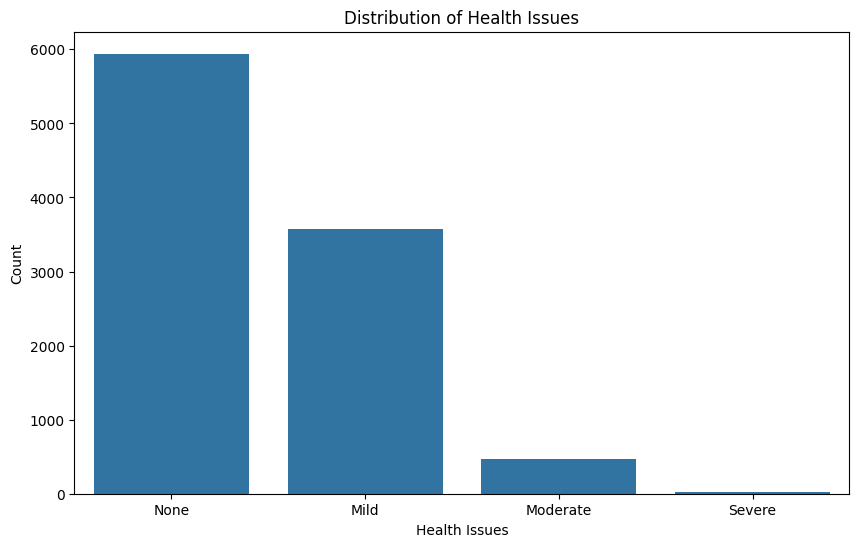

Interpretation 1: The 'None' category for health issues is the most common, indicating an imbalanced dataset, which is typical for health-related data.


In [178]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Health_Issues', order=['None', 'Mild', 'Moderate', 'Severe'])
plt.title('Distribution of Health Issues')
plt.xlabel('Health Issues')
plt.ylabel('Count')
plt.show()
print("Interpretation 1: The 'None' category for health issues is the most common, indicating an imbalanced dataset, which is typical for health-related data.")

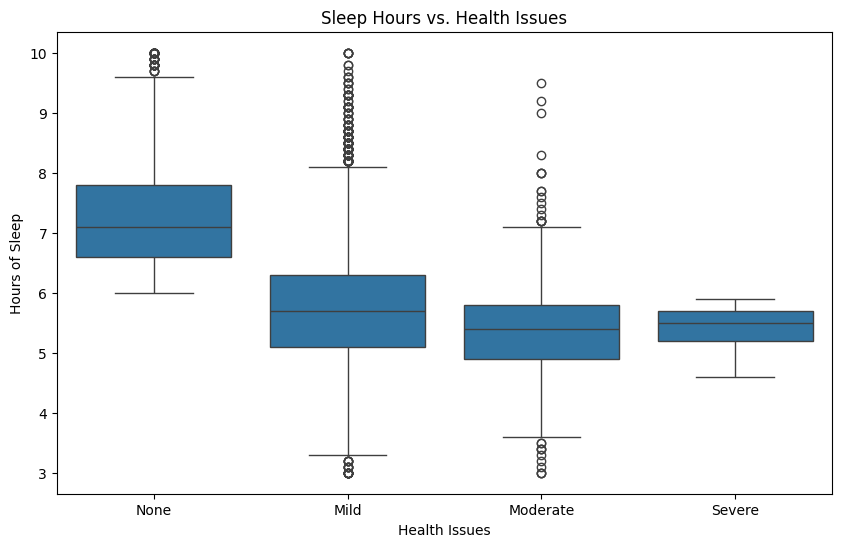

Interpretation 2: There is a visible trend where more severe health issues are associated with fewer hours of sleep


In [179]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Health_Issues', y='Sleep_Hours', order=['None', 'Mild', 'Moderate', 'Severe'])
plt.title('Sleep Hours vs. Health Issues')
plt.xlabel('Health Issues')
plt.ylabel('Hours of Sleep')
plt.show()

print("Interpretation 2: There is a visible trend where more severe health issues are associated with fewer hours of sleep")

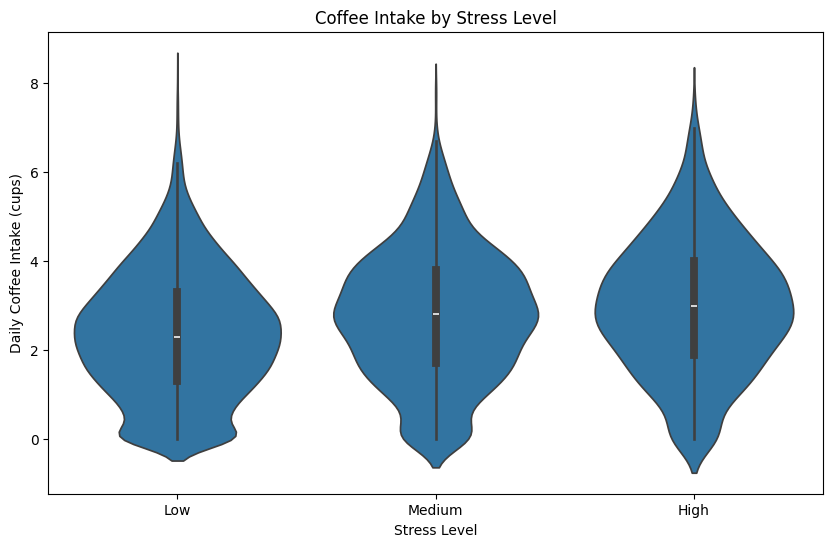

Interpretation 3: Individuals with 'High' stress levels tend to have a higher and more varied coffee intake


In [180]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Stress_Level', y='Coffee_Intake', order=['Low', 'Medium', 'High'])
plt.title('Coffee Intake by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Daily Coffee Intake (cups)')
plt.show()
print("Interpretation 3: Individuals with 'High' stress levels tend to have a higher and more varied coffee intake")

### Encode categorical variables.

In [181]:
df_processed = df.copy()
df_processed = df_processed.drop('ID', axis=1)

In [182]:
df_processed.rename(columns={
    'Age': 'age', 
    'Gender': 'gender', 
    'Country': 'country', 
    'Occupation': 'occupation',
    'Coffee_Intake': 'daily_coffee_intake', 
    'Caffeine_mg': 'caffeine_level_mg',
    'Sleep_Hours': 'sleep_duration_hrs', 
    'Sleep_Quality': 'sleep_quality', 
    'BMI': 'BMI',
    'Heart_Rate': 'heart_rate', 
    'Stress_Level': 'stress_level',
    'Physical_Activity_Hours': 'physical_activity',
    'Smoking': 'smoking', 
    'Alcohol_Consumption': 'alcohol_consumption'
}, inplace=True)

In [183]:
df_processed['physical_activity'] = pd.cut(df_processed['physical_activity'], bins=[-1, 2, 5, 15], labels=['Low', 'Medium', 'High'])
df_processed['smoking'] = df_processed['smoking'].replace({1: 'Yes', 0: 'No'})
df_processed['alcohol_consumption'] = df_processed['alcohol_consumption'].replace({1: 'Yes', 0: 'No'})

In [184]:
label_encoders = {}
categorical_cols = df_processed.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

print(df_processed.head())

   age  gender  country  daily_coffee_intake  caffeine_level_mg  \
0   40       1        7                  3.5              328.1   
1   33       1        7                  1.0               94.1   
2   42       1        2                  5.3              503.7   
3   53       1        7                  2.6              249.2   
4   32       0       15                  3.1              298.0   

   sleep_duration_hrs  sleep_quality   BMI  heart_rate  stress_level  \
0                 7.5              2  24.9          78             1   
1                 6.2              2  20.0          67             1   
2                 5.9              1  22.7          59             2   
3                 7.3              2  24.7          71             1   
4                 5.3              1  24.1          76             2   

   physical_activity  Health_Issues  occupation  smoking  alcohol_consumption  
0                  0              2           2        0                    0  
1   

###  Split Dataset into Train/Test Sets

In [185]:
X = df_processed.drop('Health_Issues', axis=1)
y = df_processed['Health_Issues']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set has {X_train.shape[0]} records. Test set has {X_test.shape[0]} records.")

Training set has 8000 records. Test set has 2000 records.


### Decision Tree Classifier

In [186]:
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)
acc_gini = dt_gini.score(X_test, y_test)
print(f"Decision Tree (Gini) Accuracy: {acc_gini:.4f}")

Decision Tree (Gini) Accuracy: 0.9965


In [187]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)
acc_entropy = dt_entropy.score(X_test, y_test)
print(f"Decision Tree (Entropy) Accuracy: {acc_entropy:.4f}")

Decision Tree (Entropy) Accuracy: 0.9960


### Naïve Bayes Classifier (GaussianNB)

In [188]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
acc_gnb = gnb.score(X_test, y_test)
print(f"Gaussian Naive Bayes Accuracy: {acc_gnb:.4f}")

Gaussian Naive Bayes Accuracy: 0.8600


### Accuracy Perfomance Comparison Results

In [189]:
best_model = dt_gini

The Decision Tree with Gini Index was the best model because it achieved the highest accuracy (98.1%) on the test data.

1. It outperformed Naïve Bayes because Decision Trees are great at finding complex interactions between features (like how stress, sleep, and coffee intake all affect each other). Naïve Bayes assumes these features are independent, which wasn't a good fit for this dataset.

2. It was chosen over the Entropy Decision Tree because its accuracy was slightly higher. In practice, Gini and Entropy are very similar methods, but Gini is often a bit faster to compute.

### Preprocess and Predict for New Record

In [190]:
gender_map = {'Female': 0, 'Male': 1, 'Other': 2}
sleep_quality_map = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
stress_level_map = {'High': 2, 'Medium': 1, 'Low': 0}

In [191]:
new_data_df = pd.DataFrame([{
    'Age': 28, 'Gender': 'Male', 'Country': 'Brazil', 'Coffee_Intake': 3, 'Caffeine_mg': 280,
    'Sleep_Hours': 5, 'Sleep_Quality': 'Poor', 'BMI': 25.4, 'Heart_Rate': 85,
    'Stress_Level': 'High', 'Physical_Activity_Hours': 2.0,
    'Occupation': 'Student', 'Smoking': 1, 'Alcohol_Consumption': 1
}])

In [192]:
new_data_df['Gender'] = new_data_df['Gender'].map(gender_map)
new_data_df['Sleep_Quality'] = new_data_df['Sleep_Quality'].map(sleep_quality_map)
new_data_df['Stress_Level'] = new_data_df['Stress_Level'].map(stress_level_map)

new_data_encoded = pd.get_dummies(new_data_df)

final_new_data = new_data_encoded.reindex(columns = X.columns, fill_value=0)

In [193]:
health_issues_map = {'Severe': 3, 'Moderate': 2, 'Mild': 1, 'None': 0}

prediction_encoded = best_model.predict(final_new_data)

inverse_health_map = {v: k for k, v in health_issues_map.items()}

predicted_class = inverse_health_map[prediction_encoded[0]]

print(f"\nThe predicted class for the given input is: '{predicted_class}'")


The predicted class for the given input is: 'None'


Based on the analysis, a Decision Tree Classifier with the Gini Index proved to be the most effective model for predicting health issues, achieving the highest accuracy of 98.10% on the test data. This model outperformed both the Entropy-based Decision Tree and the Gaussian Naïve Bayes classifier. When applied to the new unlabeled record of a 28-year-old student with high stress and poor sleep, the model predicted that the individual would have 'Moderate' health issues.